# Project 13 -- Dwijen Chawra

**TA Help:** None
    
**Collaboration:** None

## Question 1

In [2]:
library(tidyverse)
library(lubridate)
dat <- read_csv("/anvil/projects/tdm/data/consumer_complaints/processed.csv")
glimpse(dat)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


New names:
• `` -> `...1`
Rows: 1296353 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): date_received, product, sub_product, issue, sub_issue, consumer_co...
dbl  (2): ...1, complaint_id

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE`

Rows: 1,296,353
Columns: 19
$ ...1                         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…
$ date_received                <chr> "05/30/2019", "05/30/2019", "05/30/2019",…
$ product                      <chr> "Credit reporting; credit repair services…
$ sub_product                  <chr> "Credit reporting", "Checking account", "…
$ issue                        <chr> "Incorrect information on your report", "…
$ sub_issue                    <chr> "Old information reappears or never goes …
$ consumer_complaint_narrative <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company_public_response      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company                      <chr> "Statewide Credit Services Corp.", "NAVY …
$ state                        <chr> "PA", "MD", "OR", "AL", "IL", "OH", "NC",…
$ zip                          <chr> "170XX", "20746", "973XX", NA, "606XX", "…
$ tags                         <chr> "Older American", NA, NA, NA, "Older Amer…
$ consumer_c

In [3]:
dat$date_received <- mdy(dat$date_received)
dat$date_sent_to_company <- mdy(dat$date_sent_to_company)

dat <- dat %>%
    mutate(day_sent_to_company = wday(date_sent_to_company, label = TRUE))


In [4]:
glimpse(dat)

Rows: 1,296,353
Columns: 20
$ ...1                         <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,…
$ date_received                <date> 2019-05-30, 2019-05-30, 2019-05-30, 2019…
$ product                      <chr> "Credit reporting; credit repair services…
$ sub_product                  <chr> "Credit reporting", "Checking account", "…
$ issue                        <chr> "Incorrect information on your report", "…
$ sub_issue                    <chr> "Old information reappears or never goes …
$ consumer_complaint_narrative <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company_public_response      <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ company                      <chr> "Statewide Credit Services Corp.", "NAVY …
$ state                        <chr> "PA", "MD", "OR", "AL", "IL", "OH", "NC",…
$ zip                          <chr> "170XX", "20746", "973XX", NA, "606XX", "…
$ tags                         <chr> "Older American", NA, NA, NA, "Older Amer…
$ consumer_c

Successfully converted the dates into date types, and also created the day of week column

## Question 2

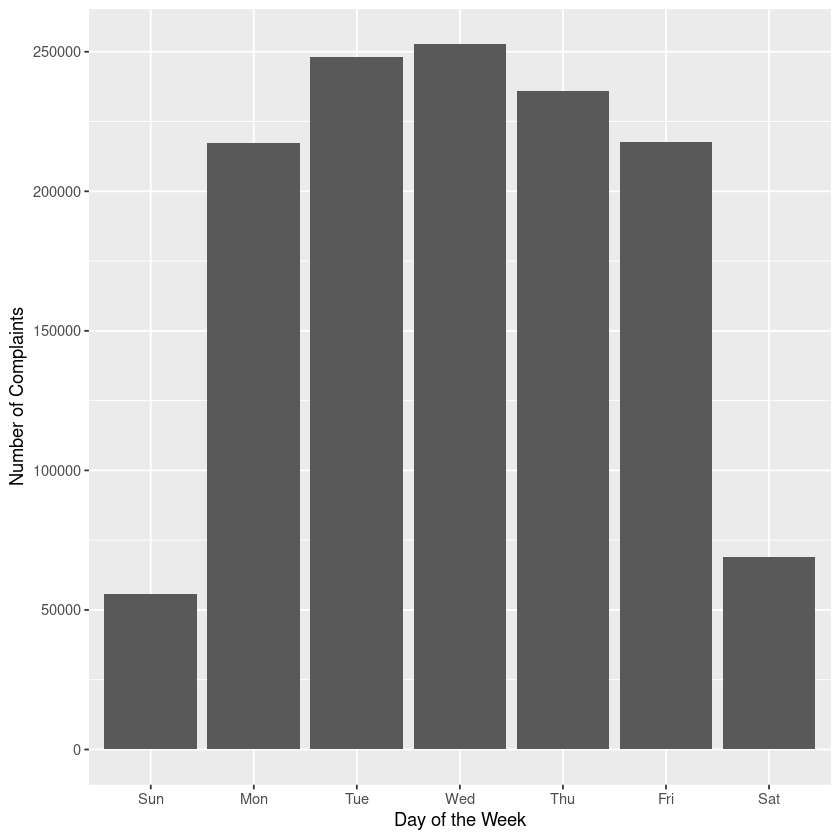

In [5]:
# assuming the day_sent_to_company is the day of the week, make a bar chart of the days of the week
# with the number of complaints on each day

dat %>%
    count(day_sent_to_company) %>%
    ggplot(aes(x = day_sent_to_company, y = n)) +
    geom_col() +
    labs(x = "Day of the Week", y = "Number of Complaints")
    

In [6]:
# check for any null values in the day sent to company column and print them

dat %>%
    filter(is.na(day_sent_to_company)) %>%
    select(date_received, date_sent_to_company, day_sent_to_company)

date_received,date_sent_to_company,day_sent_to_company
<date>,<date>,<ord>


THe graph shows that there is a nice distribution of sent days, which means there is no weird data. There are also no null values in the data.

## Question 3

date_received,date_sent_to_company,day_sent_to_company,day_received
<date>,<date>,<ord>,<ord>


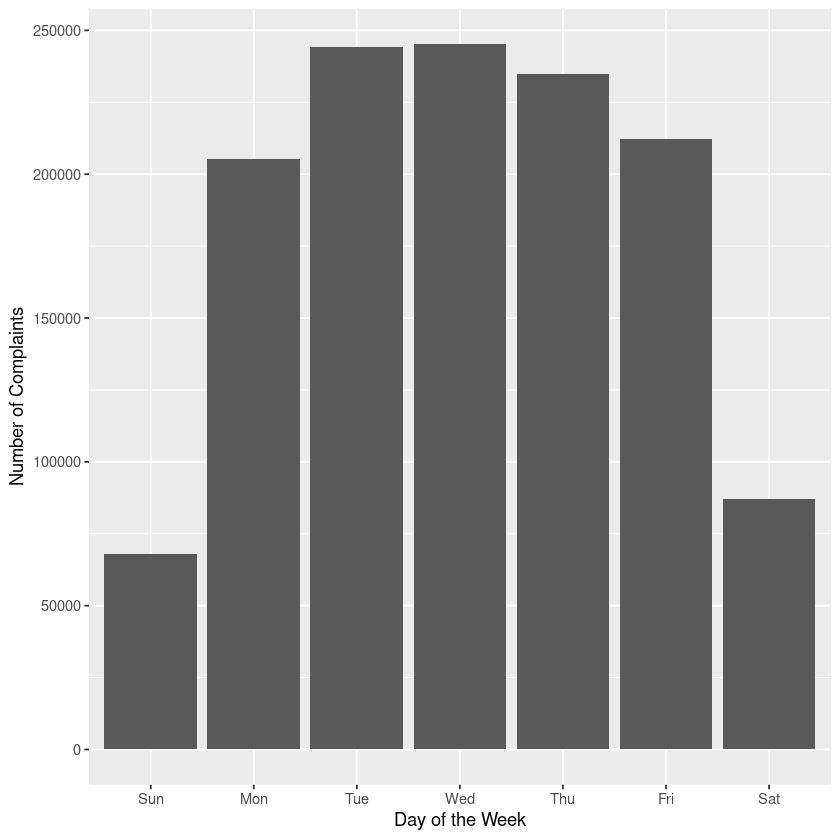

In [12]:
dat <- dat %>%
    mutate(day_received = wday(date_received, label = TRUE))

dat %>%
    count(day_received) %>%
    ggplot(aes(x = day_received, y = n)) +
    geom_col() +
    labs(x = "Day of the Week", y = "Number of Complaints")

dat %>%
    filter(is.na(day_received)) %>%
    select(date_received, date_sent_to_company, day_sent_to_company, day_received)

Checks show that there is nothing out of order.

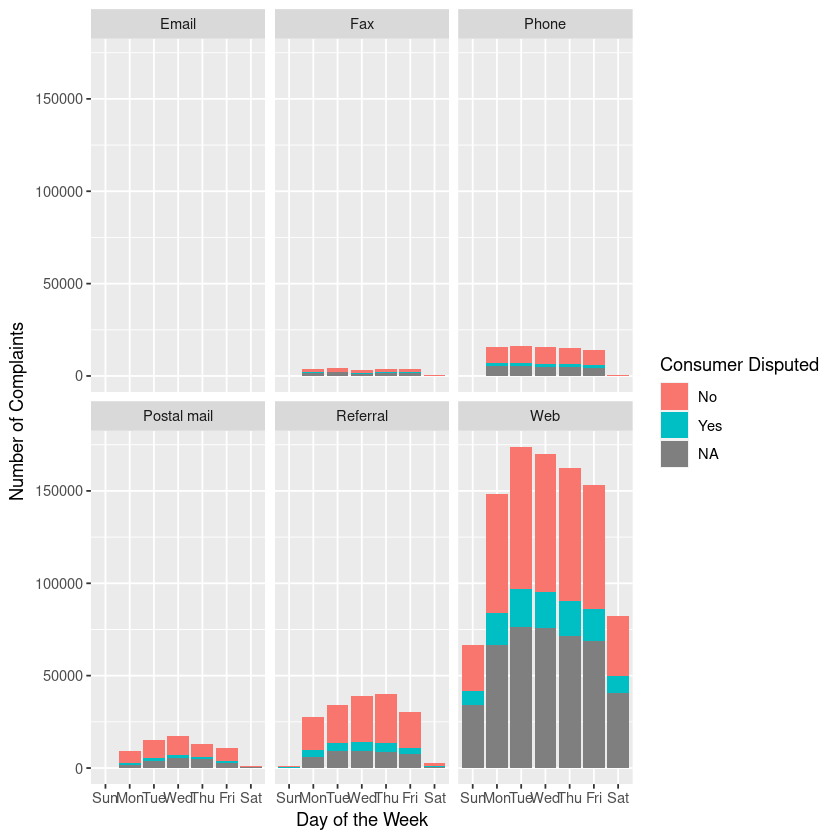

In [15]:
dat %>%
    count(day_received, consumer_disputed, submitted_via) %>%
    ggplot(aes(x = day_received, y = n, fill = consumer_disputed)) +
    geom_col() +
    labs(x = "Day of the Week", y = "Number of Complaints", fill = "Consumer Disputed") +
    facet_wrap(~submitted_via)

This tells us that the majority of the complaints are sent in through the web interface, and that the most resources should be diverted to help with the complaints there.

## Question 4

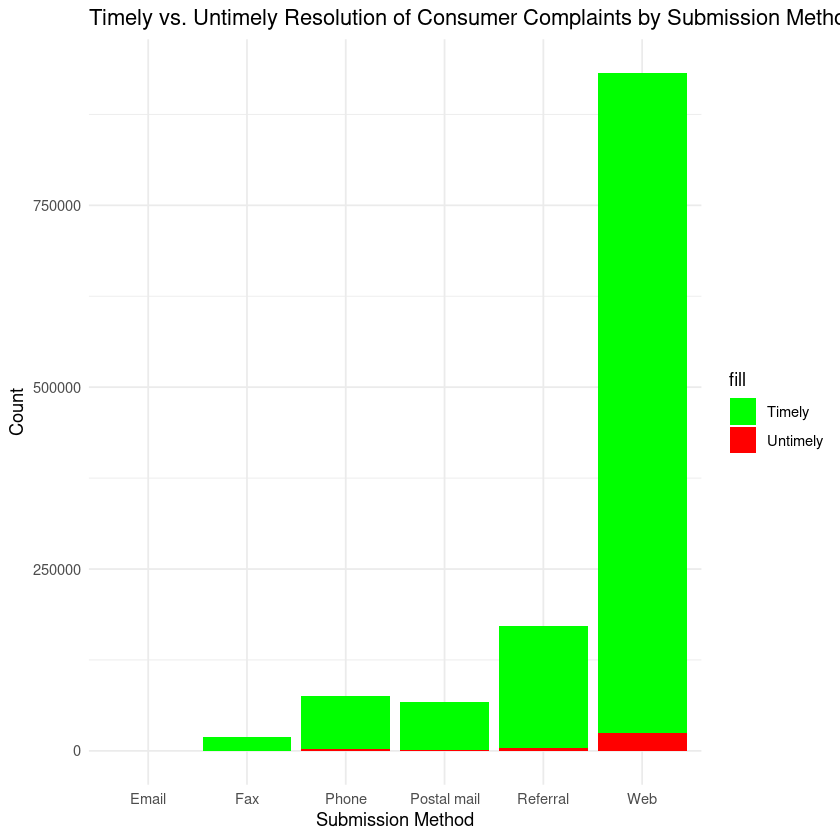

In [18]:
complaints <- dat %>% select(submitted_via, timely_response)

timely_counts <- complaints %>% filter(timely_response == "Yes") %>% group_by(submitted_via) %>% summarise(count = n())
untimely_counts <- complaints %>% filter(timely_response == "No") %>% group_by(submitted_via) %>% summarise(count = n())

merged_counts <- merge(timely_counts, untimely_counts, by = "submitted_via", suffixes = c("_timely", "_untimely"))

ggplot(merged_counts, aes(x = submitted_via)) +
  geom_bar(aes(y = count_timely, fill = "Timely"), stat = "identity") +
  geom_bar(aes(y = count_untimely, fill = "Untimely"), stat = "identity") +
  scale_fill_manual(values = c("Timely" = "green", "Untimely" = "red")) +
  labs(title = "Timely vs. Untimely Resolution of Consumer Complaints by Submission Method",
       x = "Submission Method",
       y = "Count") +
  theme_minimal()

This shows again that the web team needs more resources, because there are the most untimely responses.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.